###INTRODUCTION
In Today's world the Health Insurance is important for an individual or for families as it provides financial protection, access to healthcare services, comprehensive coverage, preventive care, and peace of mind. It  ensures timely medical interventions and protects against the potentially overwhelming costs of healthcare.



###Goal of the study:
In Insurance company's point of view,fixing the health insurance price for an individual or for families is a big challenge.Based on the given dataset ,perform all data analysis and machine learning tasks to create a machine learning model which can predict the health insurance cost.

With the help of the Health Insurance dataset we perform Explotatory Data Analysis to acquire knowledge and apply necessary steps to provide the result for the prediction of health insurance cost.

###Dataset Description:
The Health Insurance Cost Dataset provides an information about an individual's smoking status (whether they are a smoker or not) and their parental status (whether they have children or not) and many more.

The Columns of the dataset given are as follows:

    1.age:      age of the primary beneficiary

    2.gender:      insurance contractor gender, female, male

    3.bmi:      Body Mass Index, providing an understanding of body weight
                that
                are relatively high or low relative to height, objective
                index of body weight (kg/m²)
                using the ratio of height to weight, ideally 18.5 to 24.9
                
    4.children: number of children covered by health insurance, number of
                dependents

    5.smoking_status:   smoking or not

    6.region:   the beneficiary’s residential area in the US, northeast,
                southeast, southwest, northwest.

    7.Health_insurance_price:  individual medical costs billed by health insurance

###Approach:
The approach choosen for the given dataset based on the category is supervised learning and based on the problem is Linear regression because it predicts the real number of the health insurance cost.

#####Perform EDA:

In [1]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
# To load the data (.xlsx file)
insurance_cost = pd.read_excel("Health_insurance_cost.xlsx")

**Step1: Understanding the data**

In [4]:
print(insurance_cost)



       age  gender     BMI  Children smoking_status   location  \
0     19.0  female     NaN         0            yes  southwest   
1     18.0    male  33.770         1             no  southeast   
2     28.0    male  33.000         3             no  southeast   
3     33.0    male  22.705         0             no  northwest   
4     32.0    male  28.880         0             no  northwest   
...    ...     ...     ...       ...            ...        ...   
1333  50.0    male  30.970         3             no  northwest   
1334  18.0  female  31.920         0             no  northeast   
1335  18.0  female  36.850         0             no  southeast   
1336  21.0  female  25.800         0             no  southwest   
1337  61.0  female  29.070         0            yes  northwest   

      health_insurance_price  
0                16884.92400  
1                 1725.55230  
2                 4449.46200  
3                21984.47061  
4                 3866.85520  
...                  

From the dataset given we came to now that there are totally 1338 rows and 7 columns.Also it is clear that there are missing values in some columns.

In [5]:
#To get the information about the dataset
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In this we have 4 numerical and 3 categorical features.We observe that there are few missing values in age,BMI and health_insurance_price column.

In [6]:
#view the basic statistical values mean,SD,percentile etc
insurance_cost.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#checking any zero
zero=insurance_cost==0
count=zero.sum(axis=0)
print(count)

age                         0
gender                      0
BMI                         0
Children                  574
smoking_status              0
location                    0
health_insurance_price      0
dtype: int64


As above mentioned code there is no irrelavant zero in the column

In [8]:
#Check the total missing values
insurance_cost.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<Axes: >

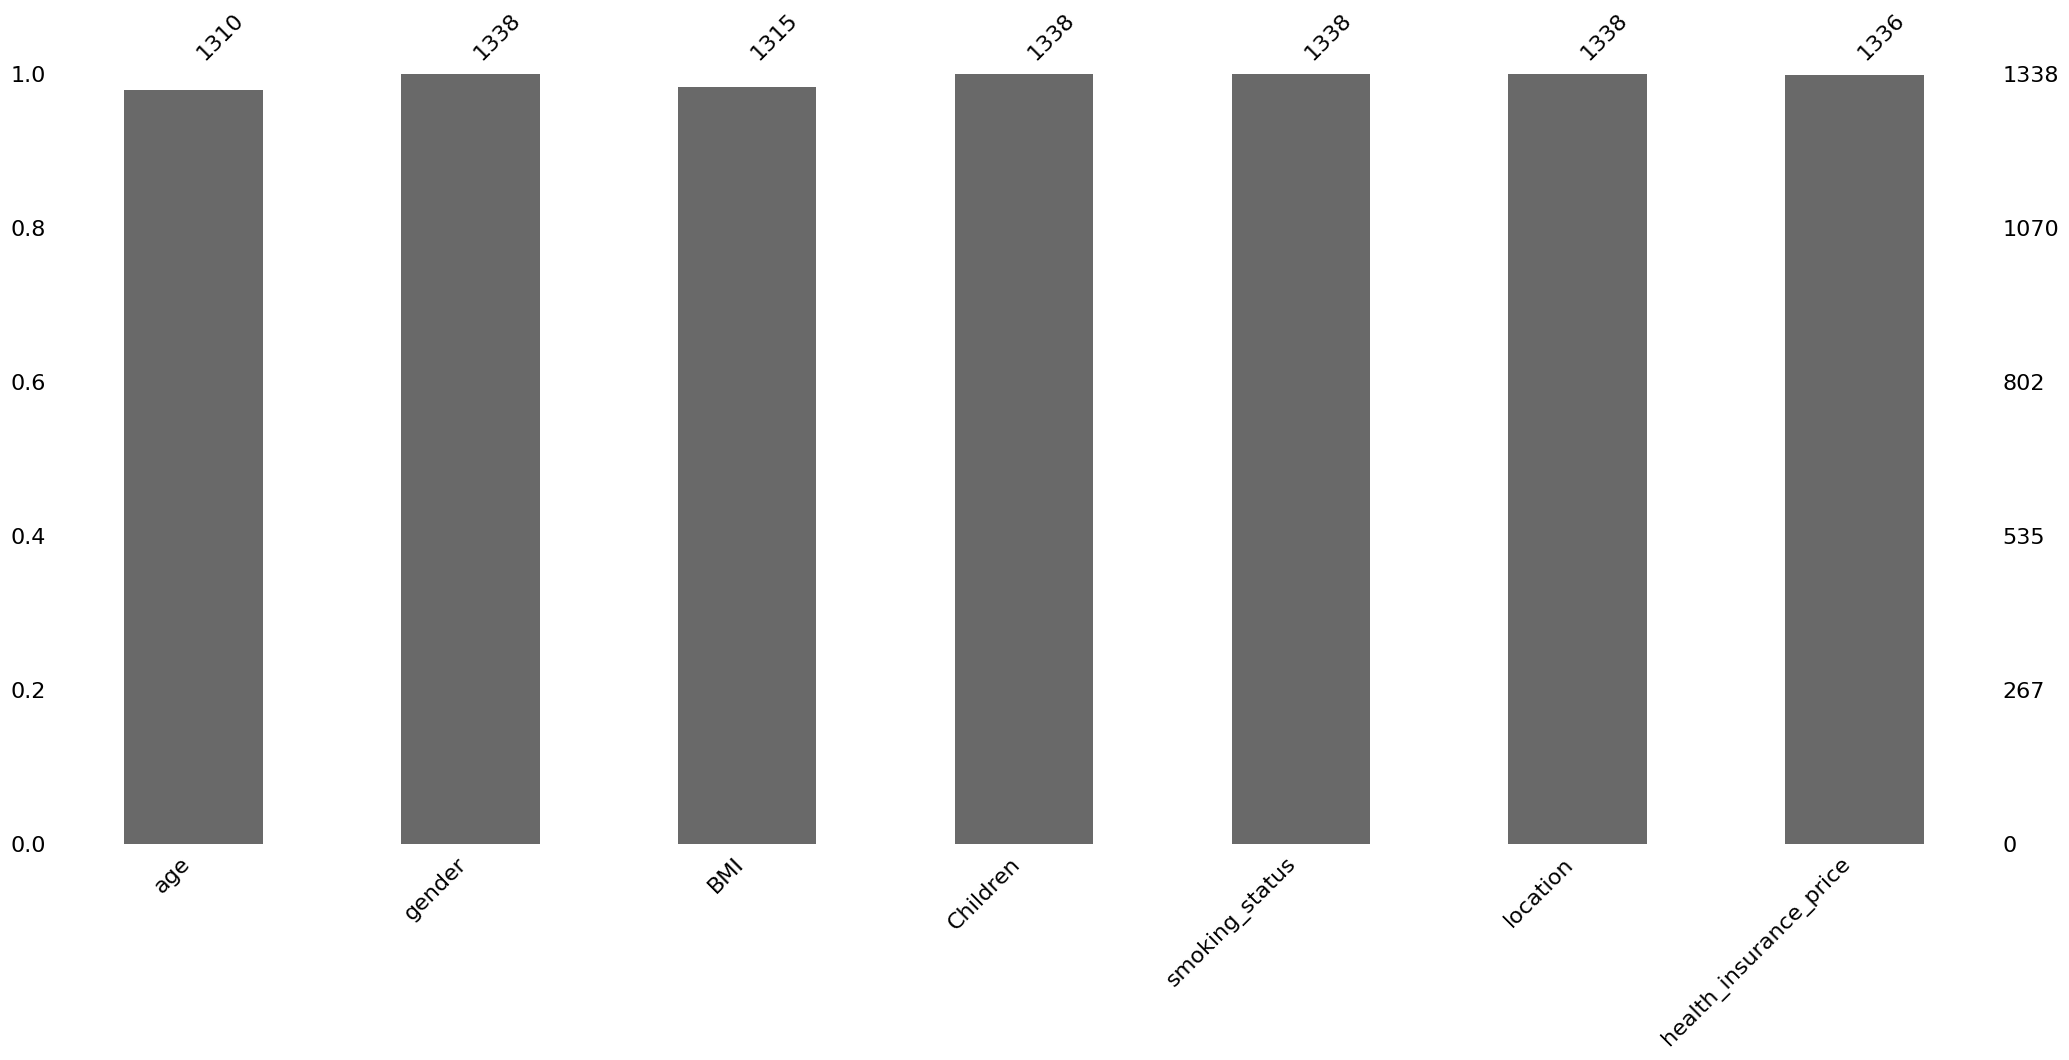

In [9]:
# msno.bar is a simple visualization of null values by column:

msno.bar(insurance_cost)

<Axes: >

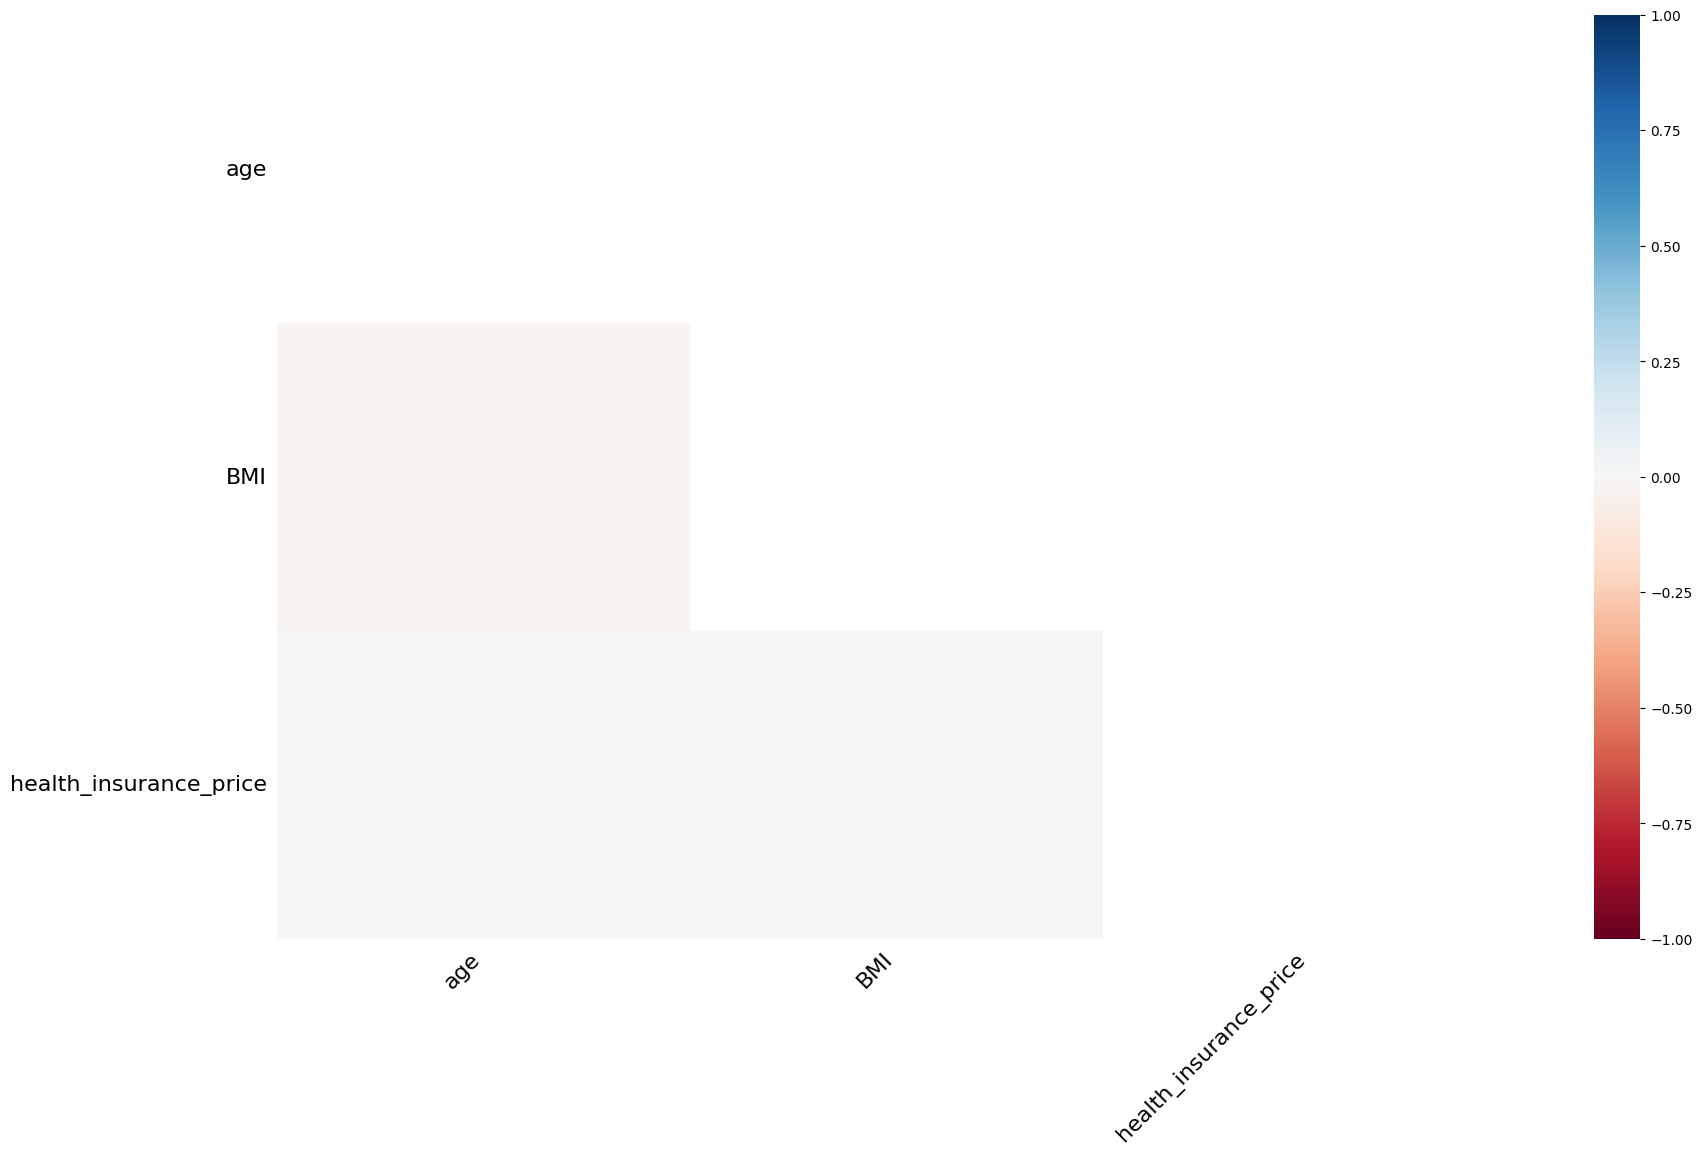

In [10]:
# To check the missing no. correlation heatmap measures nullity correlation.

msno.heatmap(insurance_cost)

From the above heatmap we conclude that there is no corelation between missing values.

In [11]:
#check  the unique values in our dataset
insurance_cost.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In the above unique values we mainly see the gender,location and smoking status for the category.Rest all numerical variables.

In [12]:
#check the datatypes of the column
insurance_cost.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [13]:
# checking for the unique values in gender column
insurance_cost['gender'].unique()


array(['female', 'male'], dtype=object)

In [14]:
# checking for the unique values in smoking_status column
insurance_cost['smoking_status'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
# checking for the unique values in location column
insurance_cost['location'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

From the above step it is clear that our data do not contain any unnecessary values in any other format.

**Step2: Data Cleaning**

In [16]:
#Drop the duplicate rows
insurance_cost.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


By observing the number of rows above, it appears that one duplicate row has been deleted.

**First we have to convert categorical values to numerical values using ordinal encoding**

In [17]:
#for column gender
insurance_cost['gender']=insurance_cost['gender'].map({'female':0,'male':1})
insurance_cost.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,yes,southwest,16884.92400
1,18.0,1,33.770,1,no,southeast,1725.55230
2,28.0,1,33.000,3,no,southeast,4449.46200
3,33.0,1,22.705,0,no,northwest,21984.47061
4,32.0,1,28.880,0,no,northwest,3866.85520


In [18]:
#for column smoking_status
insurance_cost['smoking_status']=insurance_cost['smoking_status'].map({'yes':1,'no':0})
insurance_cost.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520


In [19]:
#for column location
insurance_cost['location']=insurance_cost['location'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':4})
insurance_cost.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,4,16884.92400
1,18.0,1,33.770,1,0,3,1725.55230
2,28.0,1,33.000,3,0,3,4449.46200
3,33.0,1,22.705,0,0,2,21984.47061
4,32.0,1,28.880,0,0,2,3866.85520


In [20]:
insurance_cost.dtypes

age                       float64
gender                      int64
BMI                       float64
Children                    int64
smoking_status              int64
location                    int64
health_insurance_price    float64
dtype: object

Creating dummy varaibles to perform the imputation techniques

Here only few missing values in the columns age,BMI,health_insurance_price.In age 28 missing values,BMI contains 23 missing values and health_insurance_price contains only 2 missing values.

**So first use mean approach to fill the missing values**.

In [21]:
from sklearn.impute import SimpleImputer
insurance_cost_mean=insurance_cost.copy(deep=True)
si=SimpleImputer(strategy='mean')
insurance_cost_mean.iloc[:,:]=si.fit_transform(insurance_cost_mean)

<ipython-input-21-175c4edb4476>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  insurance_cost_mean.iloc[:,:]=si.fit_transform(insurance_cost_mean)


In [22]:
insurance_cost_mean.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,30.638217,0.0,1.0,4.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,3.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,3.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,2.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,2.0,3866.85520


From the above observation the NaN value of BMI is changed to its mean(30.638217)

In [23]:

print(insurance_cost_mean.describe())

               age       gender          BMI     Children  smoking_status  \
count  1338.000000  1338.000000  1338.000000  1338.000000     1338.000000   
mean     39.166412     0.505232    30.638217     1.094918        0.204783   
std      13.907422     0.500160     6.057517     1.205493        0.403694   
min      18.000000     0.000000    15.960000     0.000000        0.000000   
25%      27.000000     0.000000    26.315000     0.000000        0.000000   
50%      39.166412     1.000000    30.495000     1.000000        0.000000   
75%      51.000000     1.000000    34.430000     2.000000        0.000000   
max      64.000000     1.000000    53.130000     5.000000        1.000000   

          location  health_insurance_price  
count  1338.000000             1338.000000  
mean      2.515695            13268.527719  
std       1.104885            12103.734649  
min       1.000000             1121.873900  
25%       2.000000             4746.521225  
50%       3.000000             9388.

Comparing the above two code the missing values are filled and there is no difference in the mean of the columns.

**Using median imputation technique**

In [24]:
insurance_cost_median=insurance_cost.copy(deep=True)
si=SimpleImputer(strategy='median')
insurance_cost_median.iloc[:,:]=si.fit_transform(insurance_cost_median)

<ipython-input-24-fc586279a32e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  insurance_cost_median.iloc[:,:]=si.fit_transform(insurance_cost_median)


In [25]:

print(insurance_cost_median.describe())

               age       gender          BMI     Children  smoking_status  \
count  1338.000000  1338.000000  1338.000000  1338.000000     1338.000000   
mean     39.162930     0.505232    30.632489     1.094918        0.204783   
std      13.907443     0.500160     6.057672     1.205493        0.403694   
min      18.000000     0.000000    15.960000     0.000000        0.000000   
25%      27.000000     0.000000    26.315000     0.000000        0.000000   
50%      39.000000     1.000000    30.305000     1.000000        0.000000   
75%      51.000000     1.000000    34.430000     2.000000        0.000000   
max      64.000000     1.000000    53.130000     5.000000        1.000000   

          location  health_insurance_price  
count  1338.000000             1338.000000  
mean      2.515695            13262.718310  
std       1.104885            12104.666613  
min       1.000000             1121.873900  
25%       2.000000             4746.521225  
50%       3.000000             9382.

In [26]:
#Before applying KNN imputation technique split the label data from other features
cost=insurance_cost_mean.health_insurance_price
new_insurance_cost=insurance_cost.drop('health_insurance_price',axis=1)

**Now use KNN imputation technique**

In [27]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=4473310dd6cb5f5fe1ab7e7cb37bee53c98df08936fdd440902f19a1ba014f67
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=ec8e52c302e70d7a11804dbed0aa7b4bf1b0b0ef0de31dd9b5f8f55c4972cd57
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [28]:
# import KNN library
from fancyimpute import KNN
knn_imputer=KNN()
insurance_cost_knn=new_insurance_cost.copy(deep=True)
insurance_cost_knn.iloc[:,:]=knn_imputer.fit_transform(insurance_cost_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.306
Imputing row 101/1338 with 0 missing, elapsed time: 0.308
Imputing row 201/1338 with 0 missing, elapsed time: 0.309
Imputing row 301/1338 with 0 missing, elapsed time: 0.310
Imputing row 401/1338 with 0 missing, elapsed time: 0.312
Imputing row 501/1338 with 0 missing, elapsed time: 0.313
Imputing row 601/1338 with 0 missing, elapsed time: 0.314
Imputing row 701/1338 with 0 missing, elapsed time: 0.315
Imputing row 801/1338 with 0 missing, elapsed time: 0.316
Imputing row 901/1338 with 0 missing, elapsed time: 0.317
Imputing row 1001/1338 with 0 missing, elapsed time: 0.318
Imputing row 1101/1338 with 0 missing, elapsed time: 0.319
Imputing row 1201/1338 with 0 missing, elapsed time: 0.320
Imputing row 1301/1338 with 0 missing, elapsed time: 0.322


<ipython-input-28-8a4992c82457>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  insurance_cost_knn.iloc[:,:]=knn_imputer.fit_transform(insurance_cost_knn)


In [29]:
insurance_cost_knn.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,0.0,26.200008,0.0,1.0,4.0
1,18.0,1.0,33.770000,1.0,0.0,3.0
2,28.0,1.0,33.000000,3.0,0.0,3.0
3,33.0,1.0,22.705000,0.0,0.0,2.0
4,32.0,1.0,28.880000,0.0,0.0,2.0


In [30]:
print(insurance_cost_mean.mean())
print(insurance_cost_median.mean())
print(insurance_cost_knn.mean())

age                          39.166412
gender                        0.505232
BMI                          30.638217
Children                      1.094918
smoking_status                0.204783
location                      2.515695
health_insurance_price    13268.527719
dtype: float64
age                          39.162930
gender                        0.505232
BMI                          30.632489
Children                      1.094918
smoking_status                0.204783
location                      2.515695
health_insurance_price    13262.718310
dtype: float64
age               39.137402
gender             0.505232
BMI               30.638327
Children           1.094918
smoking_status     0.204783
location           2.515695
dtype: float64


Among the mean,median and KNN approach the mean for all the columns are same.So we choose any one approach.Here we take KNN approach

Now again add the label column to the dataset

In [31]:
health_insurance=pd.concat([insurance_cost_knn,cost],axis=1)
health_insurance.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,26.200008,0.0,1.0,4.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,3.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,3.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,2.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,2.0,3866.85520


Now convert numerical values to categorical values for visualise the data

In [32]:
health_insurance['gender']=health_insurance.gender.map({0:'female',1:'male'})
health_insurance['smoking_status']=health_insurance.smoking_status.map({0:'no',1:'yes'})
health_insurance['location']=health_insurance.location.map({1:'northeast',2:'northwest',3:'southeast',4:'southwest'})
health_insurance.head()


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,26.200008,0.0,yes,southwest,16884.92400
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,33.000000,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.880000,0.0,no,northwest,3866.85520


Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis.

Distribution of numerical data
Univariate analysis

In [33]:
# age
fig = px.histogram(health_insurance, x="age", nbins=15,  height = 500, width = 500 ,color=None)
fig.show()


In [34]:
fig = px.box(health_insurance, y="age", height = 500, width = 500)
fig.show()

By seeing the above graph the data is normally distributed and there is no outliers.

In [35]:
fig = px.histogram(health_insurance, x="gender", nbins=25, height = 500, width = 500)
fig.show()

The male and female are more or less equal

In [36]:
fig = px.histogram(health_insurance, x="BMI", nbins=8, height = 500, width = 500)
fig.show()

BMI is normally distributed

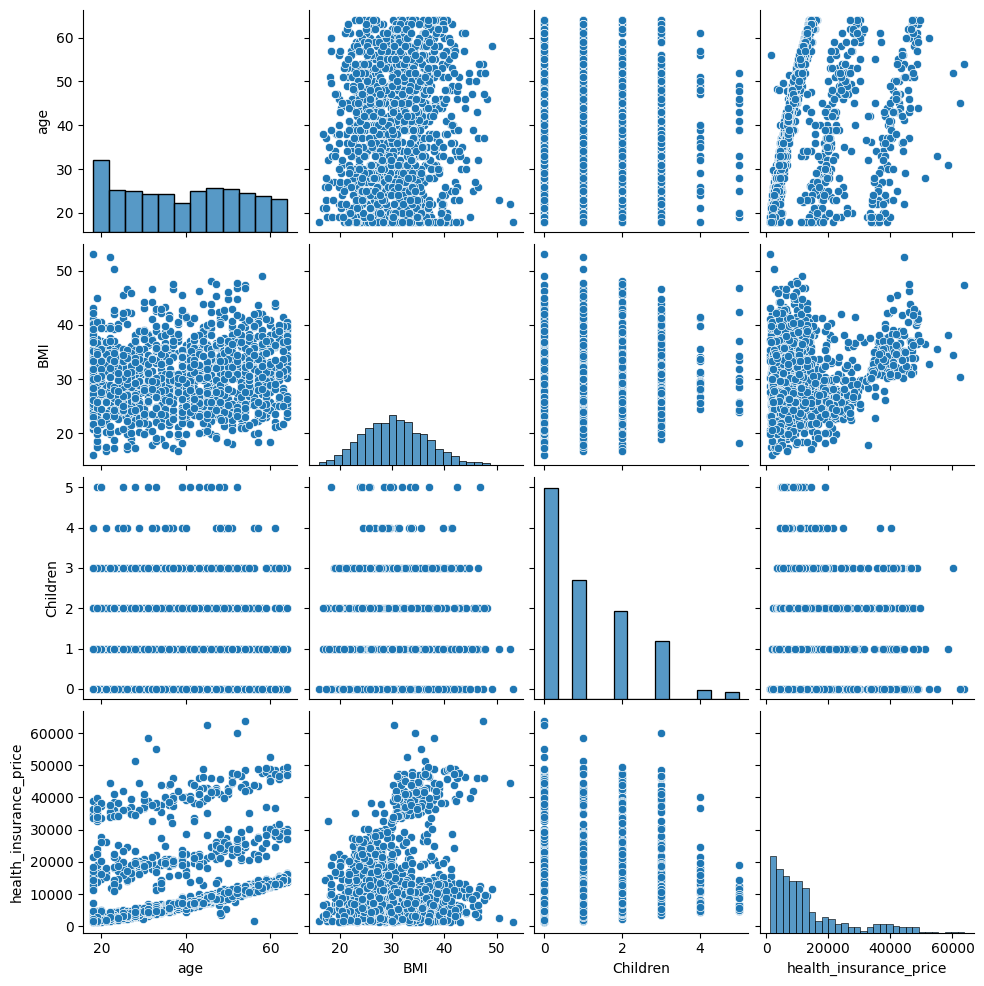

In [37]:
sns.pairplot(health_insurance)

As there is no linear relation between variables, let's go with spearman correlation matrix, which gives wider X perspective on what exactly are we dealing with here and a correlation matrix is a table showing correlation coefficients between variables and is used to summarize data as an input into a more advanced analysis and also a diagnostic for advanced analysis.

In [38]:
corr = health_insurance.corr(method = "spearman")
corr

<ipython-input-38-28dba643817e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,BMI,Children,health_insurance_price
age,1.000000,0.102818,0.058447,0.519570
BMI,0.102818,1.000000,0.021832,0.119533
Children,0.058447,0.021832,1.000000,0.132909
health_insurance_price,0.519570,0.119533,0.132909,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

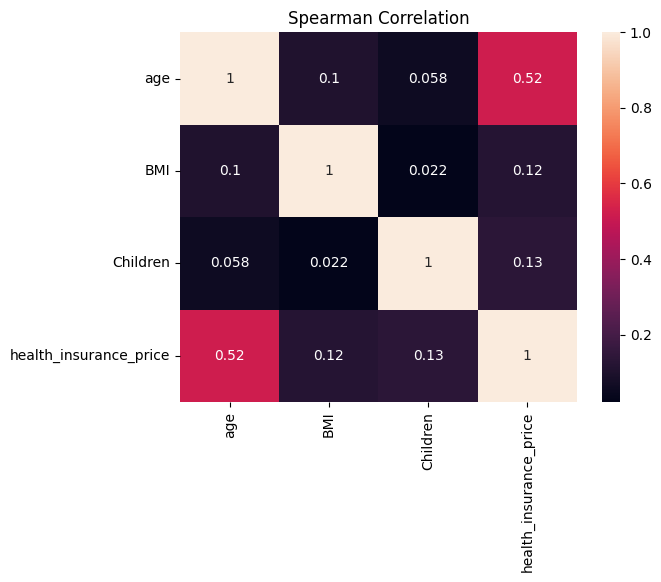

In [39]:
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot = True)
plt.title("Spearman Correlation")

It can be observed that there is no negative correlation and the age and health_insurance_price are moderately correlated

In [40]:
#get the count of unique values
print("GENDER")
print(pd.value_counts(health_insurance['gender']))
print()
print("SMOKING STATUS")
print(pd.value_counts(health_insurance['smoking_status']))
print()
print("LOCATION")
print(pd.value_counts(health_insurance['location']))



GENDER
male      676
female    662
Name: gender, dtype: int64

SMOKING STATUS
no     1064
yes     274
Name: smoking_status, dtype: int64

LOCATION
southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64


We can visually see the categorical values using plots

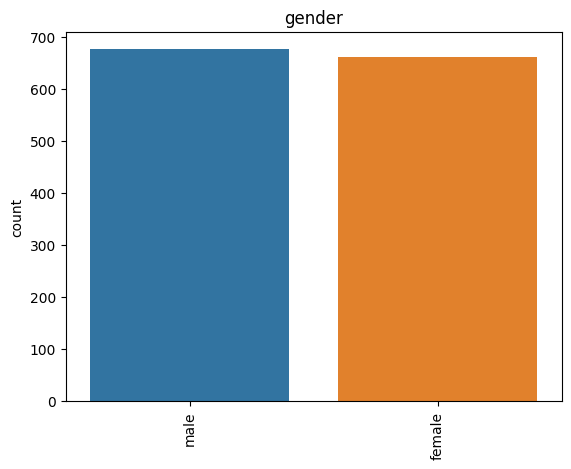

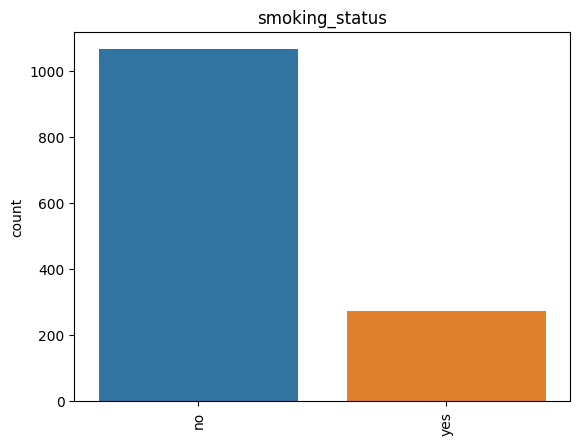

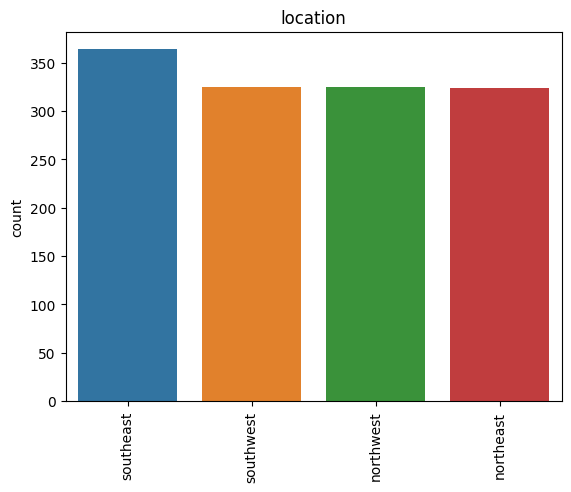

In [41]:
 # Creating a dataframe containing categorical features
health_cat = health_insurance[['gender', 'smoking_status', 'location' ]]
for i in health_cat.columns:
    cat_num = health_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "count"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    chart.y ="count"
    plt.title(title)
    plt.show()


From the above graph we can say
*  Male and female policy holder is more or less same
*  Most of the policy holders are not smokers
*  The location of the policy holders are in southeast region





#### Analysis by group

<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

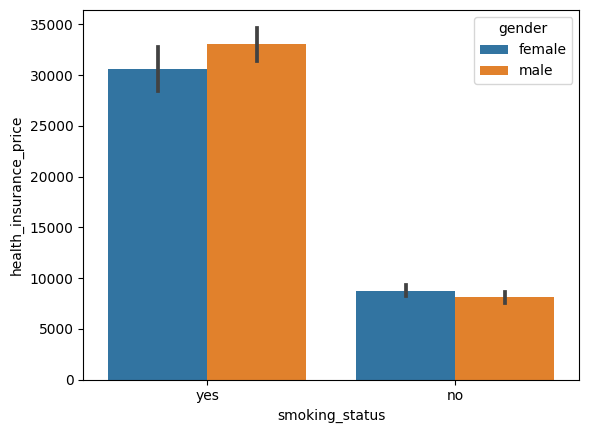

In [42]:
sns.barplot(y ='health_insurance_price', x ='smoking_status', data = health_insurance, hue ='gender')

The premium of health insurance price is little high for male smokers and for non smokers the premium is less

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

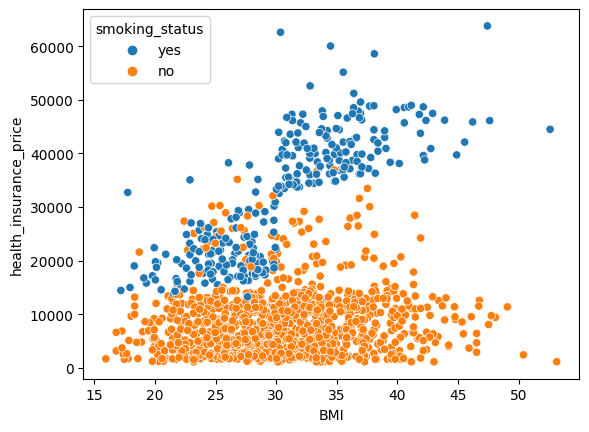

In [43]:
sns.scatterplot(y ='health_insurance_price', x ='BMI', data = health_insurance, hue ='smoking_status')

We can see that the non smoking person with BMI between 20 and 35  having less premium and the smoking person with BMI between 30 and 40 having high premium.

From the above visualisations we conclude that male and female policy holder are more or less same.Depends on the smoking status and BMI the premium has been fixed.

Categorize the age

 we will create categorical groups based on the age column. The following categorical variables will belong to the "Age_group" column:

-> Young Adult: Clients age ranges from (18 - 25).

-> Adults: Clients age ranges from (25-45)

-> Senior: Clients age ranges from (46-65)

->

In [44]:
health_insurance['Age_Group'] = np.nan

lst = [health_insurance]

for col in lst:
    col.loc[(col['age'] >=18) & (col['age'] <= 25), 'Age_Group'] = 'Young Adults'
    col.loc[(col['age'] > 25) & (col['age'] <= 55), 'Age_Group'] = 'Adults'
    col.loc[(col['age'] > 55) , 'Age_Group'] = 'Senior'


health_insurance.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Age_Group
0,19.0,female,26.200008,0.0,yes,southwest,16884.92400,Young Adults
1,18.0,male,33.770000,1.0,no,southeast,1725.55230,Young Adults
2,28.0,male,33.000000,3.0,no,southeast,4449.46200,Adults
3,33.0,male,22.705000,0.0,no,northwest,21984.47061,Adults
4,32.0,male,28.880000,0.0,no,northwest,3866.85520,Adults


<Axes: xlabel='Age_Group', ylabel='health_insurance_price'>

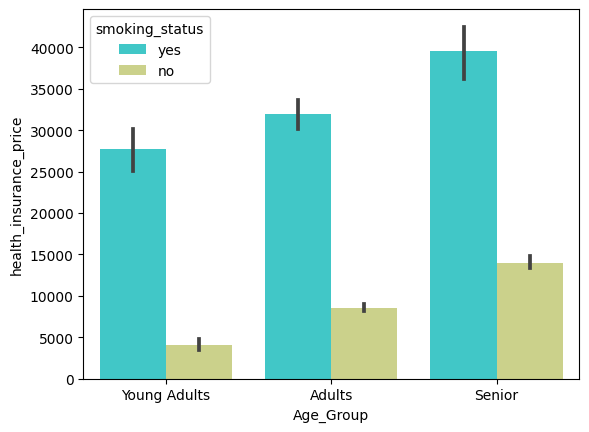

In [45]:
sns.barplot(x='Age_Group',y='health_insurance_price',data=health_insurance,palette='rainbow',hue='smoking_status')

The premium is very high for smoking young adults when compared to non smoking young adults.For smoking senior citizen the premium is high.

Text(0.5, 1.0, 'Distribution of gender based on age group')

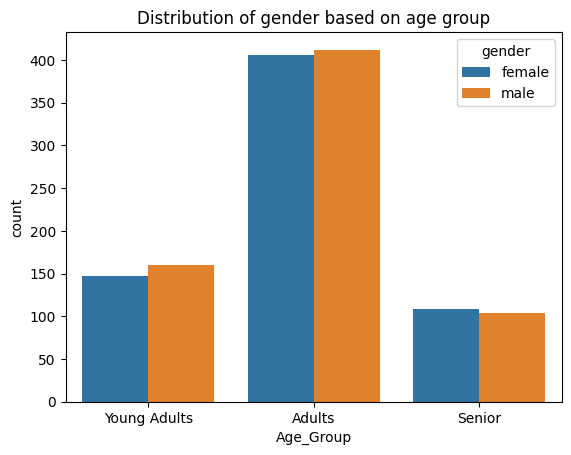

In [46]:
sns.countplot(x='Age_Group',data=health_insurance,hue='gender')
plt.title('Distribution of gender based on age group')

Insights

*  Depends on the category the insurance premium vary.
*  For obese person and smoking person the premium is high



Before splitting the data we have to convert categorical to numerical values

In [47]:
health_insurance['gender']=health_insurance['gender'].map({'female':0,'male':1})
health_insurance['smoking_status']=health_insurance['smoking_status'].map({'yes':1,'no':0})
health_insurance['location']=health_insurance['location'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':4})
health_insurance.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Age_Group
0,19.0,0,26.200008,0.0,1,4,16884.92400,Young Adults
1,18.0,1,33.770000,1.0,0,3,1725.55230,Young Adults
2,28.0,1,33.000000,3.0,0,3,4449.46200,Adults
3,33.0,1,22.705000,0.0,0,2,21984.47061,Adults
4,32.0,1,28.880000,0.0,0,2,3866.85520,Adults


###**Splitting the data**

In [48]:
x=health_insurance[['gender', 'smoking_status', 'location','age','Children','BMI']]
y=health_insurance['health_insurance_price']

In [49]:
# importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) #25% is test and 75% is training

In [50]:
X_test.head()

,gender,smoking_status,location,age,Children,BMI
44,1,0,1,38.0,1.0,37.050
134,0,0,1,20.0,0.0,28.785
980,1,0,1,54.0,1.0,25.460
618,0,1,3,19.0,0.0,33.110
1238,1,0,1,37.0,3.0,22.705


In [51]:
 # performing standardization technique on training dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.01506865, -0.52234341, -1.35602653,  1.14494307, -0.92484871,
        -0.12310791],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.21501107,  0.74203944,
        -0.92039118],
       [ 0.98515504, -0.52234341, -1.35602653, -0.21418831,  1.57548352,
        -0.49830003],
       ...,
       [ 0.98515504, -0.52234341, -0.4480862 ,  1.28800953, -0.92484871,
         0.56474433],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.2150176 ,  0.74203944,
         1.14316553],
       [-1.01506865, -0.52234341, -1.35602653, -0.21418831, -0.92484871,
        -1.76457347]])

In [52]:
#performing standardization technique on testing dataset
X_test=sc.transform(X_test)
X_test

array([[ 0.98515504, -0.52234341, -1.35602653, -0.07112185, -0.09140463,
         1.0650005 ],
       [-1.01506865, -0.52234341, -1.35602653, -1.35872001, -0.92484871,
        -0.29507096],
       [ 0.98515504, -0.52234341, -1.35602653,  1.07340984, -0.09140463,
        -0.84222615],
       ...,
       [ 0.98515504,  1.91444934, -1.35602653,  0.2865443 , -0.09140463,
         0.72107438],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.42961076, -0.09140463,
        -0.48266703],
       [-1.01506865, -0.52234341, -0.4480862 ,  1.00187661, -0.92484871,
        -0.65463009]])

### Building the Model

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = lm.predict(X_train)

In [56]:
print('coefficients:',lm.coef_)

coefficients: [ 109.8591732  9574.8519879  -333.85693057 3325.36537294  624.57167927
 2168.3227915 ]


In [57]:
# R squared error
r2 = r2_score(y_true=y_train,y_pred=y_pred)

In [58]:
print(r2)

0.7399938683970129


The R squared error value is 0.7.So the performance of the model is 75%.

In [59]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.5632790287702176e-12


Here the Mean of Residuals is closer to zero . So this metric evaluted as best fit.

<ipython-input-60-7f57fc8844d2>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='health_insurance_price', ylabel='Density'>

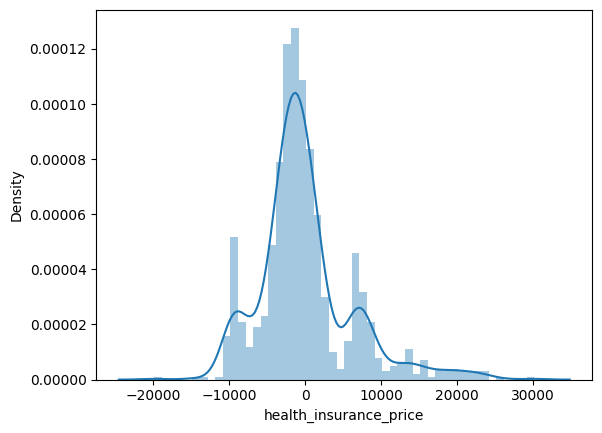

In [60]:
# check the distribution of residuals for normality in the training dataset

sns.distplot((y_train-y_pred),bins=50)

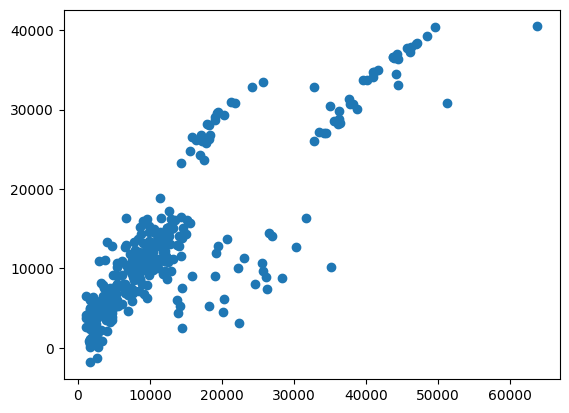

In [61]:
# scatter plot to visualize the relationship between the y_test and the predictions from the test set.
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

Remove outliers in health_insurance_price ,BMI column






In [68]:
#Using log transformation
insurance_cost_mean['health_insurance_price'] = np.log(insurance_cost_mean['health_insurance_price'])
insurance_cost_mean['BMI'] = np.log(insurance_cost_mean['BMI'])

In [69]:
#Concatenate the column health_insurance_price,BMI with
h=pd.concat([insurance_cost_knn,insurance_cost_mean['health_insurance_price']],axis=1)
health_insurance=h.drop('BMI',axis=1)
health_insurance=pd.concat([health_insurance,insurance_cost_mean['BMI']],axis=1)
health_insurance.head()

,age,gender,Children,smoking_status,location,health_insurance_price,BMI
0,19.0,0.0,0.0,1.0,4.0,9.734176,3.422248
1,18.0,1.0,1.0,0.0,3.0,7.453302,3.519573
2,28.0,1.0,3.0,0.0,3.0,8.400538,3.496508
3,33.0,1.0,0.0,0.0,2.0,9.998092,3.122585
4,32.0,1.0,0.0,0.0,2.0,8.260197,3.363149


In [70]:
x=health_insurance[['gender', 'smoking_status', 'location','age','Children','BMI']]
y=health_insurance['health_insurance_price']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) #25% is test and 75% is training

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.01506865, -0.52234341, -1.35602653,  1.14494307, -0.92484871,
        -0.02560351],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.21501107,  0.74203944,
        -0.90646727],
       [ 0.98515504, -0.52234341, -1.35602653, -0.21418831,  1.57548352,
        -0.42077225],
       ...,
       [ 0.98515504, -0.52234341, -0.4480862 ,  1.28800953, -0.92484871,
         0.62615204],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.2150176 ,  0.74203944,
         1.11495767],
       [-1.01506865, -0.52234341, -1.35602653, -0.21418831, -0.92484871,
        -2.04865362]])

In [94]:
X_test=sc.transform(X_test)
X_test

array([[ 0.98515504, -0.52234341, -1.35602653, -0.07112185, -0.09140463,
         1.0516457 ],
       [-1.01506865, -0.52234341, -1.35602653, -1.35872001, -0.92484871,
        -0.20283182],
       [ 0.98515504, -0.52234341, -1.35602653,  1.07340984, -0.09140463,
        -0.81286898],
       ...,
       [ 0.98515504,  1.91444934, -1.35602653,  0.2865443 , -0.09140463,
         0.76307315],
       [-1.01506865, -0.52234341, -0.4480862 ,  0.42961076, -0.09140463,
        -0.40366407],
       [-1.01506865, -0.52234341, -0.4480862 ,  1.00187661, -0.92484871,
        -0.59517337]])

**Using linear regression model**

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred = lm.predict(X_test)
print('coefficients:',lm.coef_)

coefficients: [-0.01636359  0.62149393 -0.05754591  0.45459112  0.12380635  0.08994145]


In [102]:
r2 = r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

0.7744572588405418


In [78]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.657844952764366e-16


In [80]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.4657797287483498


<ipython-input-81-951c65e7fee2>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='health_insurance_price', ylabel='Density'>

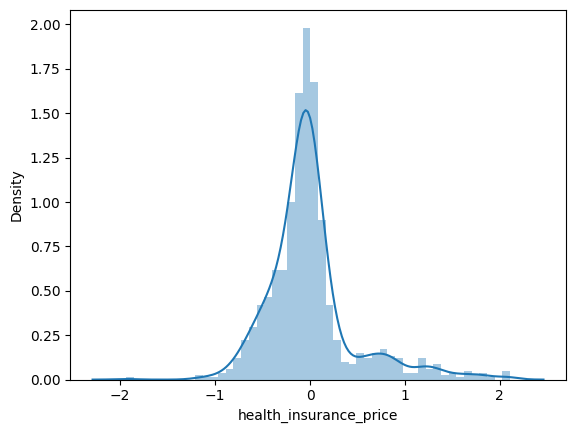

In [81]:
sns.distplot((y_train-y_pred),bins=50)

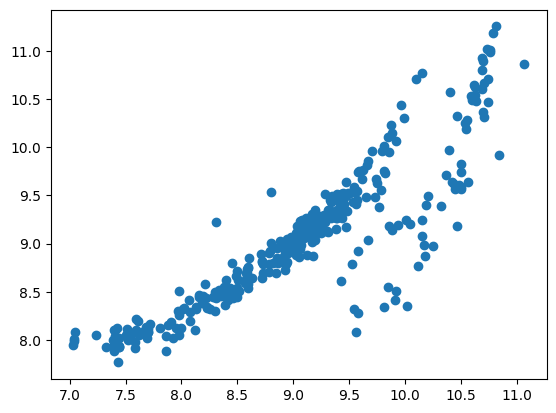

In [82]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

The above R squared error is the value got after removing outliers.It shows the best fit model of linear regession.

Now using Random Forest regressor find the RMSE

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [96]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
y_pred = rf.predict(X_test)

In [99]:
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8061380605269848


In [88]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 0.4024987878619904


The R2 score in the RandomForest regressor model is little bit more when compared to Linear Regression model .So I conclude that Random Forest Regeressor performs well for my data.